In [349]:
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Flatten, Activation, MaxPooling2D, GlobalMaxPooling2D
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, Adamax

In [350]:
def scan_size(path_im):
    images = {}
    for path in path_im[:500]:
        # récupération nom de l'image
        im_name = os.path.basename(path)
        
        # récupération des images
        img = cv2.imread(path)
        images[int(im_name[:-4])] = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
    return images

In [351]:
im_path = glob.glob('../../../images_training_rev1_resize_black/*.jpg')

In [352]:
images = scan_size(im_path)

In [353]:
images_id = list(images.keys())

In [354]:
Y_trainfull = pd.read_csv('./csv/max_benchmark.csv', index_col=0)

In [355]:
Y_trainfull = Y_trainfull.loc[images_id, :]
Y_trainfull

,shape_Class1.1,shape_Class1.2,shape_Class1.3
GalaxyID,,,
100008,0,1,0
100023,0,1,0
100078,1,0,0
100090,1,0,0
100122,1,0,0
...,...,...,...
107831,0,1,0
107849,1,0,0
107859,0,1,0


In [356]:
X_train_id, x_val_id, Y_train, y_val = train_test_split(images_id, Y_trainfull, test_size=0.2, random_state=15)

In [357]:
print(len(X_train))
print(len(Y_train))
print(len(x_val))
print(len(y_val))

400
400
100
100


In [358]:
def images_from_id(images_id, images):
    images_selected = []
    
    for image_id in images_id:
        images_selected += [images[image_id]]
    
    return images_selected

In [359]:
X_train = images_from_id(X_train_id, images)
x_val = images_from_id(x_val_id, images)

In [360]:
print(len(X_train))
X_train[0].shape

400


(66, 66, 3)

In [361]:
X_train = np.array(X_train)

In [362]:
x_val = np.array(x_val)

# Modèle CNN

In [363]:
output_number = 3
print('output_number = ', output_number)

output_number =  3


In [364]:
model2 = Sequential()
model2.add(Conv2D(15, kernel_size=(3, 3), activation='relu', input_shape=(66,66,3)))
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(15, kernel_size=(3, 3), activation='relu', input_shape=(66,66,3)))
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(15, kernel_size=(3, 3), activation='relu', input_shape=(66,66,3)))
model2.add(MaxPooling2D(2, 2))
model2.add(Flatten())
model2.add(Dense(3, activation='softmax'))

callbacks = [EarlyStopping(monitor='val_accuracy', patience=10)]

loss = 'categorical_crossentropy'
LEARNING_RATE = 0.005
EPOCHS = 1000

model2.compile(loss=loss,
               optimizer=Adamax(lr=LEARNING_RATE), # SGD(lr=LEARNING_RATE)
               metrics=['accuracy'])

history = model2.fit(X_train,
                     Y_train,
                     epochs=EPOCHS,
                     validation_data=(x_val, y_val),
                     batch_size=X_train.shape[0],
                     callbacks=callbacks)

Train on 400 samples, validate on 100 samples
Epoch 1/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.3928 - accuracy: 0.5400 - val_loss: 3.1779 - val_accuracy: 0.5700
Epoch 2/1000
400/400 [==============================] - 0s 1ms/step - loss: 3.4214 - accuracy: 0.5675 - val_loss: 6.5397 - val_accuracy: 0.4000
Epoch 3/1000
400/400 [==============================] - 0s 1ms/step - loss: 5.9563 - accuracy: 0.4425 - val_loss: 1.8982 - val_accuracy: 0.4800
Epoch 4/1000
400/400 [==============================] - 0s 1ms/step - loss: 1.8620 - accuracy: 0.5025 - val_loss: 1.5544 - val_accuracy: 0.5400
Epoch 5/1000
400/400 [==============================] - 0s 1ms/step - loss: 1.6728 - accuracy: 0.5550 - val_loss: 1.4410 - val_accuracy: 0.5400
Epoch 6/1000
400/400 [==============================] - 0s 1ms/step - loss: 1.5274 - accuracy: 0.5650 - val_loss: 1.0007 - val_accuracy: 0.5700
Epoch 7/1000
400/400 [==============================] - 0s 1ms/step - loss: 1.0143 - accur

In [365]:
score = model2.evaluate(x_val, y_val, verbose=0)
score

[0.7449106788635254, 0.5199999809265137]

In [366]:
model2.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 64, 64, 15)        420       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 32, 32, 15)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 30, 30, 15)        2040      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 15, 15, 15)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 13, 13, 15)        2040      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 540)             

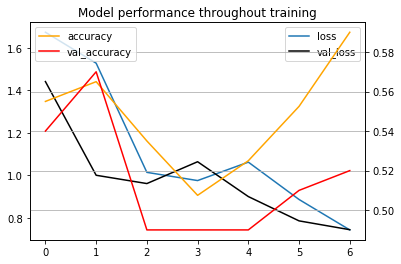

In [367]:
import pandas as pd
%matplotlib inline

fig, ax1 = plt.subplots()

plt.plot(history.history['loss'][4:], label='loss')
plt.plot(history.history['val_loss'][4:], c = 'black', label='val_loss')
plt.legend()

ax2 = ax1.twinx()
plt.plot(history.history['accuracy'][4:], c = 'orange', label='accuracy')
plt.plot(history.history['val_accuracy'][4:], c = 'red', label='val_accuracy')
plt.legend()

plt.grid(True)
plt.title('Model performance throughout training')
plt.xlabel('epoch');

In [368]:
y_predict = model2.predict(x_val)

In [369]:
y_predict[0]

array([4.0397832e-01, 5.9545970e-01, 5.6199520e-04], dtype=float32)

In [370]:
y_predict = pd.DataFrame(y_predict)
y_predict.columns = ['0','1','2']
y_predict.head()

,0,1,2
0,0.403978,0.595460,0.000562
1,0.672253,0.326966,0.000782
2,0.328521,0.671441,0.000038
3,0.329726,0.633751,0.036523
4,0.284165,0.713780,0.002055


In [371]:
for i in range(0, 3):
    y_predict.loc[y_predict[str(i)] == y_predict.agg(func=max, axis=1), str(i)] = 1
    y_predict.loc[y_predict[str(i)] < 1, str(i)] = 0

y_predict.head()

,0,1,2
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [372]:
y_val_mod = pd.DataFrame(y_val)
y_val_mod.columns = ['0','1','2']
y_val_mod.head()

,0,1,2
GalaxyID,,,
105986,0,1,0
100951,0,1,0
104314,0,1,0
106206,1,0,0
103132,0,1,0


In [373]:
y_val_mod = np.array(y_val_mod)
y_predict = np.array(y_predict)

In [374]:
def Y_transform(Y_train):
    Y_output = []
    for line in range(len(Y_train)):
        for col in range(3):
            value = str(int(Y_train[line][col]))
            if value == '1':
                Y_output += [str(col)]

    return Y_output

In [375]:
y_val_mod = Y_transform(y_val_mod)
y_predict = Y_transform(y_predict)

In [376]:
y_val_mod[:10]

['1', '1', '1', '0', '1', '1', '1', '1', '0', '0']

In [377]:
y_predict[:10]

['1', '0', '1', '1', '1', '1', '0', '1', '1', '1']

[[12 20]
 [28 40]]


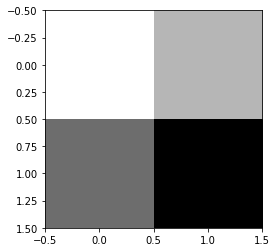

In [378]:
conf_matrix = metrics.confusion_matrix(y_predict, y_val_mod)
print(conf_matrix)
plt.imshow(conf_matrix, cmap='binary');